# 1. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Train-test-split

In [ ]:
data = pd.read_csv('/content/Train_processed.csv',index_col=[0])

In [ ]:
data.sample(7)

,Specific ailments,Age,BMI,Illness count last year,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,...,DX1,DX2,DX3,DX4,DX5,DX6,Smoker_NO,Smoker_YES,Living_URBAN,Healthy
8615,50,36,26.488897,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
2528,2,30,28.592003,3.000000,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
3346,16,14,26.532752,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1
22414,10,4,25.106019,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
13179,24,32,27.479628,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
12617,8,0,18.136559,1.752756,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
14555,31,65,29.288244,2.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [ ]:
X = data.drop(['Healthy'], axis=1)
y = data['Healthy']

In [ ]:
# the dataset is imbalanced, so first we will split it in training and testing in a stratified manner
# this is so because the test data should be representative of real world data
# then the train partition would be undersampled/oversampled to make it balanced and then trained on it

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23328, 20) (2592, 20) (23328,) (2592,)


#3. Data preprocessing

In [ ]:
ss_os = StandardScaler()
ss_us = StandardScaler()
ros = RandomOverSampler(random_state=42)
rus = RandomUnderSampler(random_state=42)

In [ ]:
# oversampling
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

# 1. std scaling
X_train_os_s = ss_os.fit_transform(X_train_os)
y_train_os_s = y_train_os # although the same, but doing for clarity

# 2. no std scaling
X_train_os_ns = X_train_os
y_train_os_ns = y_train_os

In [ ]:
# undersampling
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

# 1. std scaling
X_train_us_s = ss_us.fit_transform(X_train_us)
y_train_us_s = y_train_us # although the same, but doing for clarity

# 2. no std scaling
X_train_us_ns = X_train_us
y_train_us_ns = y_train_us

#4. Model Training

###4.1 Logistic Regression

In [ ]:
lr1 = LogisticRegression(max_iter=500)
lr2 = LogisticRegression(max_iter=500)
lr3 = LogisticRegression(max_iter=500)
lr4 = LogisticRegression(max_iter=500)

In [ ]:
lr1.fit(X_train_os_s, y_train_os_s)
lr2.fit(X_train_os_ns, y_train_os_ns)
lr3.fit(X_train_us_s, y_train_us_s)
lr4.fit(X_train_us_ns, y_train_us_ns)

LogisticRegression(max_iter=500)

###4.2 Support Vector Machine (SVM)

In [ ]:
svm1 = SVC()
svm2 = SVC()
svm3 = SVC()
svm4 = SVC()

In [ ]:
svm1.fit(X_train_os_s, y_train_os_s)
svm2.fit(X_train_os_ns, y_train_os_ns)
svm3.fit(X_train_us_s, y_train_us_s)
svm4.fit(X_train_us_ns, y_train_us_ns)

SVC()

###4.3 Decision Tree

In [ ]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier()
dt3 = DecisionTreeClassifier()
dt4 = DecisionTreeClassifier()

In [ ]:
dt1.fit(X_train_os_s, y_train_os_s)
dt2.fit(X_train_os_ns, y_train_os_ns)
dt3.fit(X_train_us_s, y_train_us_s)
dt4.fit(X_train_us_ns, y_train_us_ns)

DecisionTreeClassifier()

###4.4 Random Forest

In [ ]:
rf1 =  RandomForestClassifier()
rf2 =  RandomForestClassifier()
rf3 =  RandomForestClassifier()
rf4 =  RandomForestClassifier()

In [ ]:
rf1.fit(X_train_os_s, y_train_os_s)
rf2.fit(X_train_os_ns, y_train_os_ns)
rf3.fit(X_train_us_s, y_train_us_s)
rf4.fit(X_train_us_ns, y_train_us_ns)

RandomForestClassifier()

#5. Model evaluation

In [ ]:
def eval(model, X_test, y_test):
    y_test = np.array(y_test).reshape(-1, 1)
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
    print("Model Score: ", model.score(X_test, y_test))
    print("F1 score: ", f1_score(y_test, model.predict(X_test)))
    print("Confusion Matrix: \n")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    print("Classification report: \n",classification_report(y_test, model.predict(X_test)))
    print('----------------------------------------------------------')

Model Score:  0.6304012345679012
F1 score:  0.6832010582010583
Confusion Matrix: 



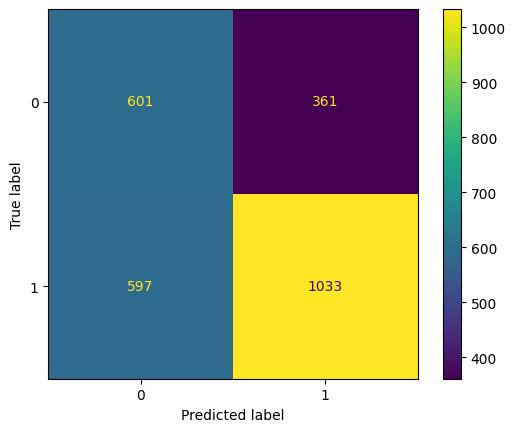

Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.56       962
           1       0.74      0.63      0.68      1630

    accuracy                           0.63      2592
   macro avg       0.62      0.63      0.62      2592
weighted avg       0.65      0.63      0.64      2592

----------------------------------------------------------
Model Score:  0.6300154320987654
F1 score:  0.682765464770096
Confusion Matrix: 



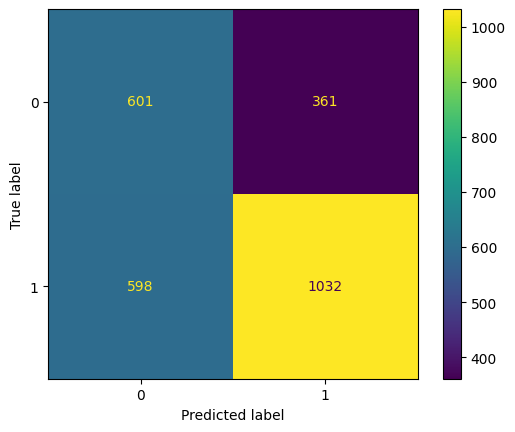

Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.56       962
           1       0.74      0.63      0.68      1630

    accuracy                           0.63      2592
   macro avg       0.62      0.63      0.62      2592
weighted avg       0.65      0.63      0.64      2592

----------------------------------------------------------
Model Score:  0.628858024691358
F1 score:  0.6818783068783069
Confusion Matrix: 



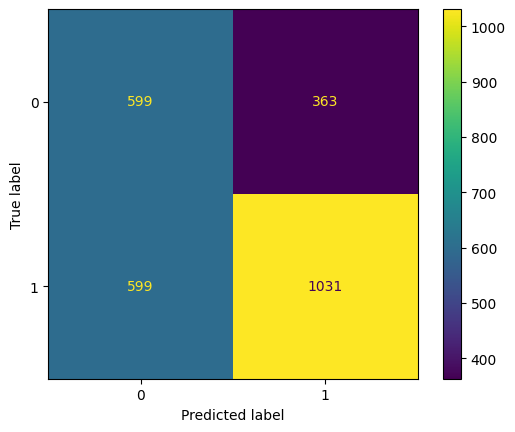

Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.55       962
           1       0.74      0.63      0.68      1630

    accuracy                           0.63      2592
   macro avg       0.62      0.63      0.62      2592
weighted avg       0.65      0.63      0.63      2592

----------------------------------------------------------
Model Score:  0.6273148148148148
F1 score:  0.6805555555555556
Confusion Matrix: 



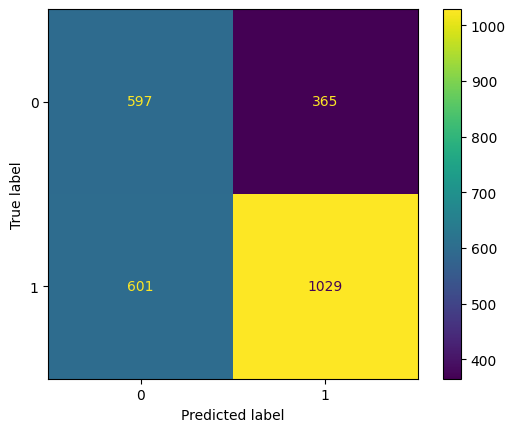

Classification report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.55       962
           1       0.74      0.63      0.68      1630

    accuracy                           0.63      2592
   macro avg       0.62      0.63      0.62      2592
weighted avg       0.65      0.63      0.63      2592

----------------------------------------------------------


In [ ]:
eval(lr1, ss_os.transform(X_test), y_test)
eval(lr2, X_test, y_test)

eval(lr3, ss_us.transform(X_test), y_test)
eval(lr4, X_test, y_test)

Model Score:  0.71875
F1 score:  0.7696682464454978
Confusion Matrix: 



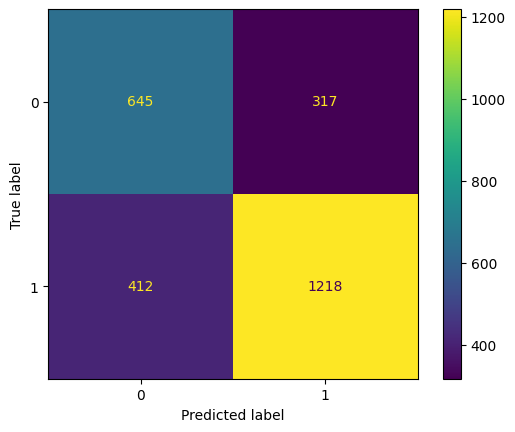

Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.67      0.64       962
           1       0.79      0.75      0.77      1630

    accuracy                           0.72      2592
   macro avg       0.70      0.71      0.70      2592
weighted avg       0.73      0.72      0.72      2592

----------------------------------------------------------
Model Score:  0.6828703703703703
F1 score:  0.7297830374753451
Confusion Matrix: 



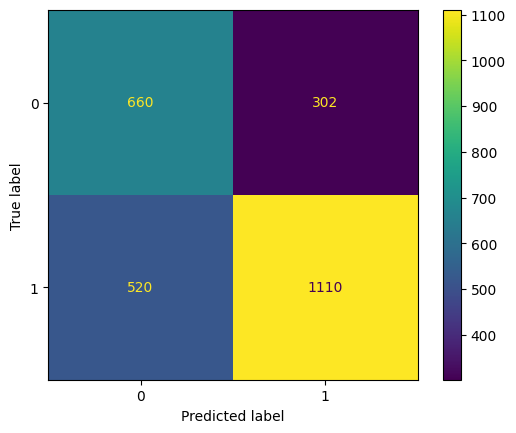

Classification report: 
               precision    recall  f1-score   support

           0       0.56      0.69      0.62       962
           1       0.79      0.68      0.73      1630

    accuracy                           0.68      2592
   macro avg       0.67      0.68      0.67      2592
weighted avg       0.70      0.68      0.69      2592

----------------------------------------------------------
Model Score:  0.7102623456790124
F1 score:  0.7631661936297699
Confusion Matrix: 



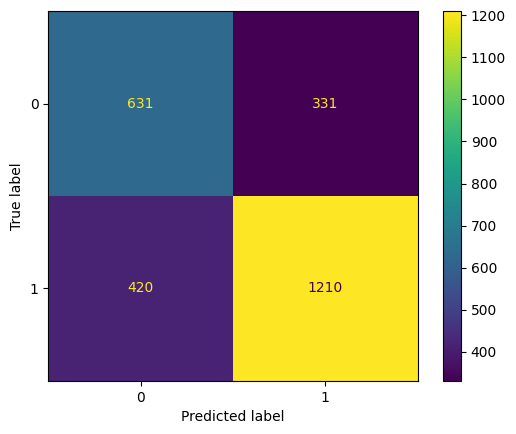

Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.66      0.63       962
           1       0.79      0.74      0.76      1630

    accuracy                           0.71      2592
   macro avg       0.69      0.70      0.70      2592
weighted avg       0.72      0.71      0.71      2592

----------------------------------------------------------
Model Score:  0.6624228395061729
F1 score:  0.707651186100902
Confusion Matrix: 



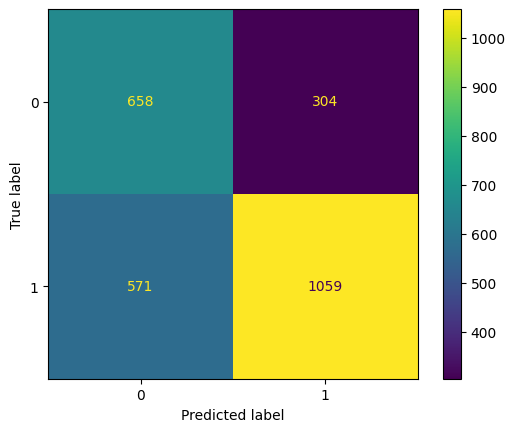

Classification report: 
               precision    recall  f1-score   support

           0       0.54      0.68      0.60       962
           1       0.78      0.65      0.71      1630

    accuracy                           0.66      2592
   macro avg       0.66      0.67      0.65      2592
weighted avg       0.69      0.66      0.67      2592

----------------------------------------------------------


In [ ]:
eval(svm1, ss_os.transform(X_test), y_test)
eval(svm2, X_test, y_test)

eval(svm3, ss_us.transform(X_test), y_test)
eval(svm4, X_test, y_test)

Model Score:  0.6793981481481481
F1 score:  0.742963192081658
Confusion Matrix: 



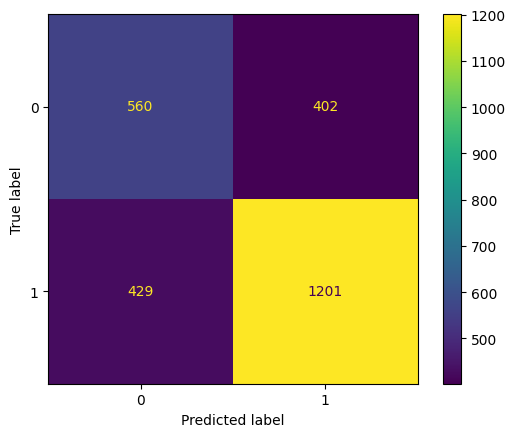

Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.58      0.57       962
           1       0.75      0.74      0.74      1630

    accuracy                           0.68      2592
   macro avg       0.66      0.66      0.66      2592
weighted avg       0.68      0.68      0.68      2592

----------------------------------------------------------
Model Score:  0.6844135802469136
F1 score:  0.7479975354282193
Confusion Matrix: 



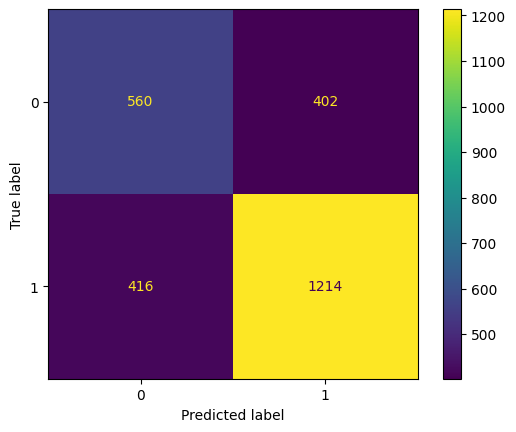

Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.58      0.58       962
           1       0.75      0.74      0.75      1630

    accuracy                           0.68      2592
   macro avg       0.66      0.66      0.66      2592
weighted avg       0.69      0.68      0.68      2592

----------------------------------------------------------
Model Score:  0.6423611111111112
F1 score:  0.6890305266689031
Confusion Matrix: 



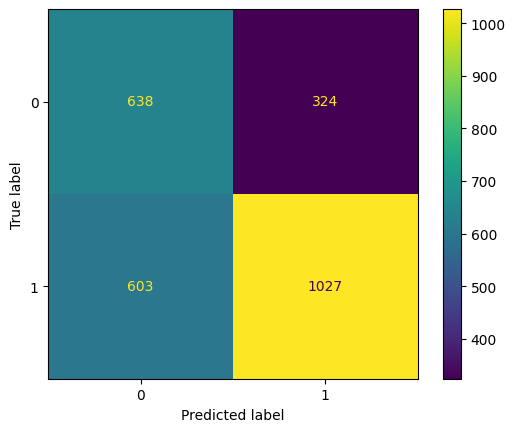

Classification report: 
               precision    recall  f1-score   support

           0       0.51      0.66      0.58       962
           1       0.76      0.63      0.69      1630

    accuracy                           0.64      2592
   macro avg       0.64      0.65      0.63      2592
weighted avg       0.67      0.64      0.65      2592

----------------------------------------------------------
Model Score:  0.6477623456790124
F1 score:  0.6957680773075642
Confusion Matrix: 



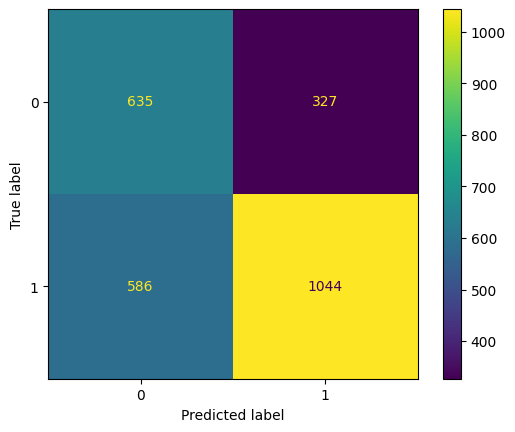

Classification report: 
               precision    recall  f1-score   support

           0       0.52      0.66      0.58       962
           1       0.76      0.64      0.70      1630

    accuracy                           0.65      2592
   macro avg       0.64      0.65      0.64      2592
weighted avg       0.67      0.65      0.65      2592

----------------------------------------------------------


In [ ]:
eval(dt1, ss_os.transform(X_test), y_test)
eval(dt2, X_test, y_test)

eval(dt3, ss_us.transform(X_test), y_test)
eval(dt4, X_test, y_test)

Model Score:  0.7438271604938271
F1 score:  0.7982989064398542
Confusion Matrix: 



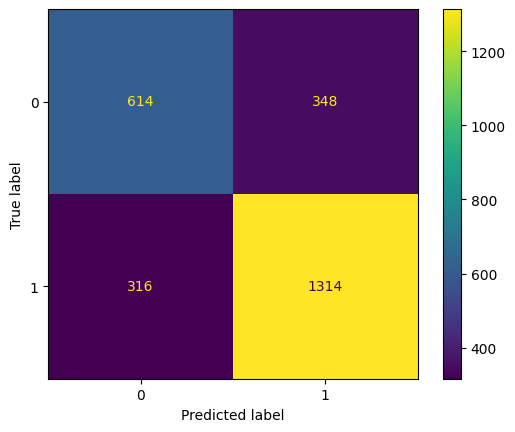

Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       962
           1       0.79      0.81      0.80      1630

    accuracy                           0.74      2592
   macro avg       0.73      0.72      0.72      2592
weighted avg       0.74      0.74      0.74      2592

----------------------------------------------------------
Model Score:  0.7465277777777778
F1 score:  0.7998781602193116
Confusion Matrix: 



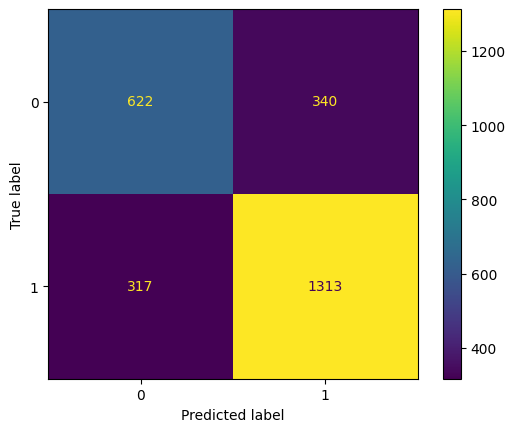

Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       962
           1       0.79      0.81      0.80      1630

    accuracy                           0.75      2592
   macro avg       0.73      0.73      0.73      2592
weighted avg       0.75      0.75      0.75      2592

----------------------------------------------------------
Model Score:  0.720679012345679
F1 score:  0.7667525773195876
Confusion Matrix: 



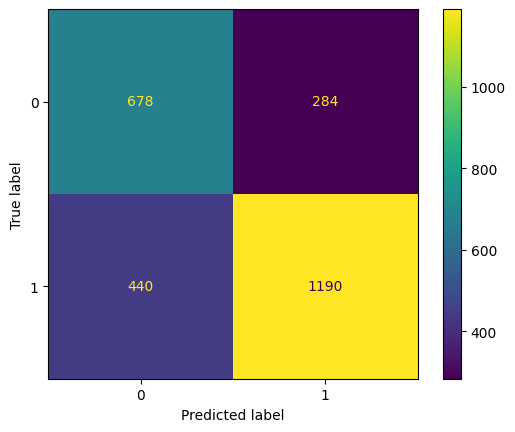

Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.70      0.65       962
           1       0.81      0.73      0.77      1630

    accuracy                           0.72      2592
   macro avg       0.71      0.72      0.71      2592
weighted avg       0.73      0.72      0.72      2592

----------------------------------------------------------
Model Score:  0.722608024691358
F1 score:  0.768438003220612
Confusion Matrix: 



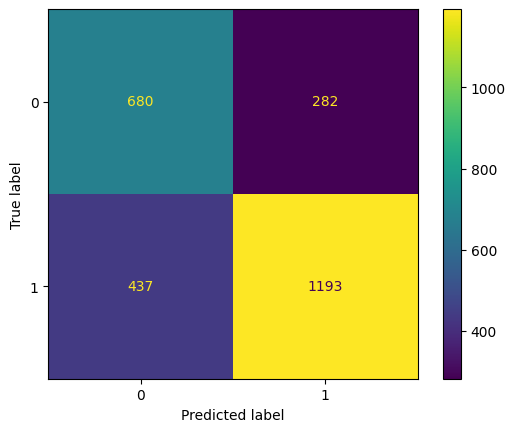

Classification report: 
               precision    recall  f1-score   support

           0       0.61      0.71      0.65       962
           1       0.81      0.73      0.77      1630

    accuracy                           0.72      2592
   macro avg       0.71      0.72      0.71      2592
weighted avg       0.73      0.72      0.73      2592

----------------------------------------------------------


In [ ]:
eval(rf1, ss_os.transform(X_test), y_test)
eval(rf2, X_test, y_test)

eval(rf3, ss_us.transform(X_test), y_test)
eval(rf4, X_test, y_test)

**Random Forest** *(rf2)* with **oversampling** and **not scaling** the data performed the best among other trained classifiers.

#6. Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

def find_best_hyper_params_using_gridsearchcv(X,y):
    algos = { # a python dictionary
        "Random Forest Classifier" : {
            "model": RandomForestClassifier(),
            "params": {
                "criterion":["gini", "entropy"],
                "max_depth": [6,8,10,12,None],
                'n_estimators': [80,128,200,300],
                'min_samples_split' : [2,4],
                'min_samples_leaf':[1,2,3],
                'max_samples':[0.75,0.80,0.9]
            }
        },
    }
    mod_scores = []
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False,scoring='f1', n_jobs=-1,verbose=4)
        gs.fit(X_train_os_s, y_train_os_s)
        mod_scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    df_df = pd.DataFrame(gs.cv_results_)
    # df_df = df_df.sort_values()
    df_df.to_csv('gs_cv_results.csv')
    return pd.DataFrame(mod_scores,columns=["model","best_score","best_params"])

performance = find_best_hyper_params_using_gridsearchcv(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


In [31]:
performance['best_score'], dict(performance['best_params'])

(0    0.848238
 Name: best_score, dtype: float64,
 {0: {'criterion': 'entropy',
   'max_depth': None,
   'max_samples': 0.8,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 200}})

#7. Model testing

In [ ]:
# the test data was preprocessed in the same way train data was processed

In [ ]:
test_data_raw = pd.read_csv('/content/Test_Data.csv')

In [ ]:
test_data_raw.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

In [ ]:
test_data_raw.drop(['ID1', 'ID2', 'Any heriditary condition?'], axis=1, inplace=True)

In [ ]:
test_data_raw.isnull().sum()

Specific ailments             0
Food preference               3
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Follow Diet                 262
Physical activity           262
Regular sleeping hours      262
Alcohol consumption         262
Social interaction          262
Taking supplements          262
Mental health management    262
Illness count last year     262
dtype: int64

In [ ]:
# all the nan values in columns except 'Food prefrence' were filled using modal imputation

In [ ]:
cols_to_be_filled_with_modal_imputation = [
    'Follow Diet','Physical activity','Regular sleeping hours','Alcohol consumption',
    'Social interaction','Taking supplements','Mental health management','Illness count last year'
    ]

In [ ]:
for col in cols_to_be_filled_with_modal_imputation:
    print(test_data_raw[col].value_counts())

1.0    5594
0.0     624
Name: Follow Diet, dtype: int64
0.0    5357
1.0     861
Name: Physical activity, dtype: int64
0.0    5068
1.0    1150
Name: Regular sleeping hours, dtype: int64
0.0    5679
1.0     539
Name: Alcohol consumption, dtype: int64
0.0    3806
1.0    2412
Name: Social interaction, dtype: int64
0.0    5876
1.0     342
Name: Taking supplements, dtype: int64
0.0    6215
1.0       3
Name: Mental health management, dtype: int64
1.0    2685
2.0    2541
3.0     847
4.0     132
5.0      13
Name: Illness count last year, dtype: int64


In [ ]:
for col in cols_to_be_filled_with_modal_imputation:
    modal_value = test_data_raw.loc[:,col].value_counts().idxmax()
    # print(modal_value)
    test_data_raw[col].fillna(value=modal_value, inplace=True)

In [ ]:
df_test_food = test_data_raw[~test_data_raw['Food preference'].isna()]['Food preference']
# df_test_food.isna().sum()

In [ ]:
splitt = df_test_food.str.split(" ")
# print(splitt)

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
test_food_binarised = mlb.fit_transform(splitt)
# print(test_food_binarised, mlb.classes_)

res = pd.DataFrame(test_food_binarised, columns=mlb.classes_)
res = res.drop([''], axis=1)
# print(res.columns)

df_try_new = pd.concat([test_data_raw, res],axis=1)
# print(df_try_new.shape)
df_try_new.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6
0,2,DX6,38,18.879331,YES,URBAN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,DX1,46,21.231991,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,37,DX4,11,17.867876,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,DX5,10,26.886096,NO,RURAL,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
4,37,DX3 DX4,3,23.362746,NO,RURAL,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df_try_new.drop(['Food preference'], axis=1, inplace=True)

In [ ]:
for col in ['DX1','DX2','DX3','DX4','DX5','DX6']:
    modal_value = df_try_new.loc[:,col].value_counts().idxmax()
    # print(modal_value)
    df_try_new[col].fillna(value=modal_value, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
smoker_ohe = ohe.fit_transform(np.array(df_try_new['Smoker?']).reshape(-1,1))
df_smoker_ohe = pd.DataFrame(smoker_ohe, columns=ohe.categories_)
# df_smoker_ohe
df_smoker_ohe.drop(['Cannot say'],axis=1,inplace=True)
df_smoker_ohe.columns=['Smoker_NO', 'Smoker_YES']
df_try_new = pd.concat([df_try_new, df_smoker_ohe], axis=1)
# df_try_new

In [ ]:
ohe1 = OneHotEncoder(sparse_output=False)
living_ohe = ohe1.fit_transform(np.array(df_try_new['Living in?']).reshape(-1,1))
df_living_ohe = pd.DataFrame(living_ohe, columns=ohe1.categories_)
# df_living_ohe.head()
df_living_ohe.drop(['RURAL'],axis=1,inplace=True)
df_living_ohe.columns=['Living_URBAN']
# df_living_ohe.head()
df_try_new = pd.concat([df_try_new, df_living_ohe], axis=1)

In [ ]:
df_try_new.drop(['Smoker?', 'Living in?'], axis=1,inplace=True)
df_try_new.shape

(6480, 20)

In [ ]:
df_try_new.head(4)

,Specific ailments,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6,Smoker_NO,Smoker_YES,Living_URBAN
0,2,38,18.879331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,5,46,21.231991,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,37,11,17.867876,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,44,10,26.886096,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
req_order = list(data.columns)
req_order = req_order[:-1]

In [ ]:
df_try_new = df_try_new[req_order]

# 8. Making predictions

In [ ]:
random_forest = RandomForestClassifier(criterion='log_loss', max_depth=8, max_samples=0.8, n_estimators=80)

In [ ]:
random_forest.fit(X_train_os_s, y_train_os_s)

RandomForestClassifier(criterion='log_loss', max_depth=8, max_samples=0.8,
                       n_estimators=80)

Model Score:  0.7411265432098766
F1 score:  0.7909005920847616
Confusion Matrix: 



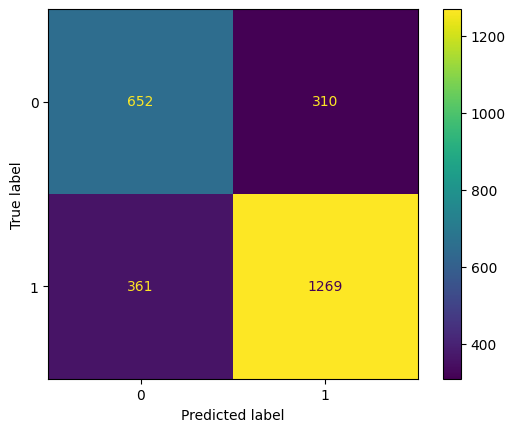

Classification report: 
               precision    recall  f1-score   support

           0       0.64      0.68      0.66       962
           1       0.80      0.78      0.79      1630

    accuracy                           0.74      2592
   macro avg       0.72      0.73      0.73      2592
weighted avg       0.74      0.74      0.74      2592

----------------------------------------------------------


In [ ]:
eval(random_forest, ss_os.transform(X_test), y_test)

In [ ]:
df_try_new.to_csv('Test_processed.csv', index=False)

In [ ]:
test_df = pd.read_csv('Test_processed.csv')

In [ ]:
y_test_pred = random_forest.predict(ss_os.transform(test_df))

In [ ]:
## creating csv for submission
result = pd.DataFrame(y_test_pred, columns = ['predictions'])
result.to_csv("Submission.csv", index=False)